## Create Kmeans Elbow Curve & Clustering Graph

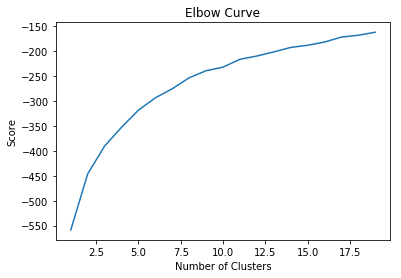

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 402 samples in 0.001s...
[t-SNE] Computed neighbors for 402 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 402 / 402
[t-SNE] Mean sigma: 0.378250
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.092285
[t-SNE] KL divergence after 300 iterations: 0.253457


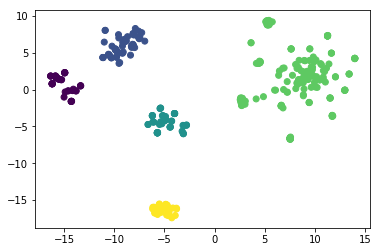

In [180]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pylab as pl

#Import data
hotels = pd.read_csv('hotel_data.csv')
activity = pd.read_csv('activity_data.csv')

#Clean data to get rid of NaN and categorical variables through ones hot encoding
df = pd.get_dummies(data=hotels, columns=['hotel_type','city_name','parent_brand_name'])
df.dropna(inplace = True)
df.drop(['hotel_id','hotel_name','brand_name'],axis = 1,inplace = True)

#Scale values from 0 to 1
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#Cluster the data
clmns = list(df)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, random_state=0) for i in Nc]
score = [kmeans[i].fit(df[clmns]).score(df[clmns]) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

clmns = list(df)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)
labels = kmeans.labels_

#Find centers
centers = np.array(kmeans.cluster_centers_)

#Glue back to original data
df['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
df.groupby(['clusters']).mean()

#run the clusters on a T sne 
tsne = TSNE(n_components = 2, verbose =1 , perplexity = 40, n_iter=300)
output = tsne.fit_transform(df.loc[:])

#visualize clusters
list1 = [i[0] for i in output]
list2 = [i[1] for i in output]
plt.scatter(list1,list2, c=labels)


## Export clusters

In [182]:
pd.DataFrame(centers).to_csv(r'centers.csv')

## Clean Data

In [146]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pylab as pl

#Import data
hotels = pd.read_csv('hotel_data.csv')
activity = pd.read_csv('activity_data.csv')

#Clean data to get rid of NaN and categorical variables through ones hot encoding
df = pd.get_dummies(data=hotels, columns=['hotel_type','city_name','parent_brand_name'])
df.dropna(inplace = True)
df.drop(['hotel_id','hotel_name','brand_name'],axis = 1,inplace = True)

#Scale values from 0 to 1
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.714286,0.750,0.097162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.285714,0.625,0.041028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.285714,0.625,0.019560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.750,0.022020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.875,0.024651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.142857,0.750,0.024481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.875,0.110611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.714286,0.875,0.067886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.714286,0.875,0.043786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.428571,0.750,0.068565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
